In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


df = pd.read_csv("full_cleaned_data.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df

,Name,Street,Price Tags,Average Rating,Review text,Category 1,Category 2,Customer Satisfaction
0,THE FARMHOUSE TAP & GRILL,Bank_St,2.0,4.0,julie another wonderful experience farmhouse! ...,burgers,tradamerica,High
1,HEN OF THE WOOD,NaN,3.0,4.5,"cozy interior, fresh (we saw farmer drop stack...",newamerican,NaN,High
2,THE GRYPHON,Main_St,2.0,4.5,"best brunch. bloody mary' die for, love unique...",nightlife,newamerican,High
3,JUNIPER BAR & RESTAURANT,Cherry_St,2.0,4.0,met family crazy thanksgiving weekend. great p...,tradamerica,NaN,High
4,HONEY ROAD,Church_St,2.0,4.5,review mentioned difficult get reservation res...,NaN,NaN,High
...,...,...,...,...,...,...,...,...
105,KRU COFFEE,Church_St,1.0,4.5,stopped last day struggling decide grab coffee...,coffee,sandwiche,High
106,HALVORSON’S UPSTREET CAFE,Church_St,2.0,3.0,great food. cozy atmosphere. made reservations...,tradamerica,beer_and_wine,Low
107,PIESANOS,Main_St,2.0,3.0,"1 1/2 hour delivery wait...i get it, it' busy,...",pizza,italian,Low
108,KESTREL COFFEE ROASTERS,Maple_St,NaN,4.5,sweet little roastery free short term streetsi...,cafes,coffee,High


[Text(0.5, 1.0, 'Customer Satisfaction Levels for Restaurants in Burlington, VT')]

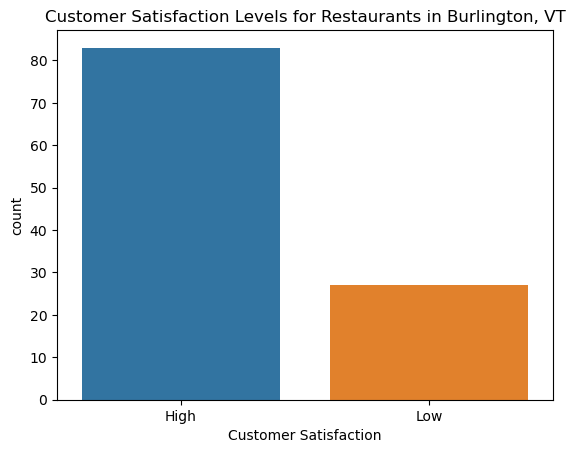

In [2]:
# we have imbalanced data
sns.countplot(x='Customer Satisfaction', data=df).set(title='Customer Satisfaction Levels for Restaurants in Burlington, VT')

#(high satisfaction = rating between 4-5)
#(low satisfaction = ratng below 4)

In [3]:
def remove_punctuation(text):
    # initializing punctuations string
    punctuation = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

    for char in text:
        if char in punctuation:
            clean_text = text.replace(char, '')
    return clean_text

In [4]:
def select_columns(data, *columns):
 
    """Select only columns passed as arguments."""

    return data.loc[:, columns]

In [5]:
def process_data(data):
 
    # Transform Data, Select Features
    data = select_columns(data,'Street','Price Tags', 'Category 1', 'Category 2', 'Customer Satisfaction')
    
    #turn y ('Customer Satisfaction') into either 1 or 0
    df['Customer Satisfaction'] = df['Customer Satisfaction'].replace('High', 1)
    df['Customer Satisfaction'] = df['Customer Satisfaction'].replace('Low', 0)
    
    return data

In [6]:
def fix_missing(df):
    '''Function to fill in missing data with the mode'''
    df[['Street']] = df[['Street']]. fillna(str('missing'))
    df[['Price Tags']] = df[['Price Tags']]. fillna(2.0) #this is the mode
    df[['Category 1']] = df[['Category 1']]. fillna(str('missing'))
    df[['Category 2']] = df[['Category 2']]. fillna(str('missing'))
    #(will drop missing col after)
    
    return df

In [7]:
def reset_index(df):
    df = df.reset_index()
    df = df.drop(['index'], axis=1)
    return df

In [8]:
def get_predictor_response_vars(data):
    # Return predictors and response variables separately
    x = data.drop(['Customer Satisfaction'], axis = 1)
    y = data.loc[:, 'Customer Satisfaction']
    
    return x, y
    


In [9]:
def one_hot_encoding(df, column_name):
    '''Returns df with chosen column replaced by one hot encoding'''
    from sklearn.feature_extraction.text import CountVectorizer
    #fit vectorizer to data
#     vectorizer = CountVectorizer()
#     vectorizer.fit_transform(df[column_name])
    
#     #convert into array of numbers
#     numbers = vectorizer.transform(df[column_name])
#     words = vectorizer.get_feature_names_out()
#     one_hot = pd.DataFrame(numbers.toarray(), columns=words)
    
    one_hot = pd.get_dummies(df[column_name])

    #add one-hot to original df, get rid of review text
    df = df.drop([column_name], axis=1)
    full_df = pd.concat([df, one_hot], axis=1)
    return full_df

In [10]:
def remove_duplicate_cols(df):
    #get rid of duplicate columns by adding them together
    df = df.groupby(axis=1, level=0).sum()
    return df

In [11]:
##PLAN REVISION - more meaningful without text reviews
#get text ready for training and test set by cleaning punctuation
# reviews_clean = []
# reviews = list(df["Review text"])
# for review in reviews:
#     reviews_clean.append(remove_punctuation(review))
# #delete old review text
# df = df.drop(['Review text'], axis=1)
# df = pd.concat([df, pd.DataFrame(reviews_clean, columns= ['Review text'])], axis=1)


In [12]:
#change price tag variables to categorical for better understanding in model
# for i in range(0,len(df)):
#     if str(df.loc[i, 'Price Tags']) == '1.0':
#         df.loc[i, 'Price Tags'] = '1_price_tags'
#     elif str(df.loc[i, 'Price Tags']) == '2.0':
#         df.loc[i, 'Price Tags'] = '2_price_tags'
#     elif str(df.loc[i, 'Price Tags']) == '3.0':
#         df.loc[i, 'Price Tags'] = '3_price_tags'
#     elif str(df.loc[i, 'Price Tags']) == '4.0':
#         df.loc[i, 'Price Tags'] = '4_price_tags'

In [13]:
df

,Name,Street,Price Tags,Average Rating,Review text,Category 1,Category 2,Customer Satisfaction
0,THE FARMHOUSE TAP & GRILL,Bank_St,2.0,4.0,julie another wonderful experience farmhouse! ...,burgers,tradamerica,High
1,HEN OF THE WOOD,NaN,3.0,4.5,"cozy interior, fresh (we saw farmer drop stack...",newamerican,NaN,High
2,THE GRYPHON,Main_St,2.0,4.5,"best brunch. bloody mary' die for, love unique...",nightlife,newamerican,High
3,JUNIPER BAR & RESTAURANT,Cherry_St,2.0,4.0,met family crazy thanksgiving weekend. great p...,tradamerica,NaN,High
4,HONEY ROAD,Church_St,2.0,4.5,review mentioned difficult get reservation res...,NaN,NaN,High
...,...,...,...,...,...,...,...,...
105,KRU COFFEE,Church_St,1.0,4.5,stopped last day struggling decide grab coffee...,coffee,sandwiche,High
106,HALVORSON’S UPSTREET CAFE,Church_St,2.0,3.0,great food. cozy atmosphere. made reservations...,tradamerica,beer_and_wine,Low
107,PIESANOS,Main_St,2.0,3.0,"1 1/2 hour delivery wait...i get it, it' busy,...",pizza,italian,Low
108,KESTREL COFFEE ROASTERS,Maple_St,NaN,4.5,sweet little roastery free short term streetsi...,cafes,coffee,High


In [14]:
#get data ready for classification model by...

# #preprocessing data
df = process_data(df)
df = fix_missing(df)

#turning all text into numerical values
#street column
df = one_hot_encoding(df, 'Street')
#review text column
#df = one_hot_encoding(df, 'Review text')
#catgory 1 column
df = one_hot_encoding(df, 'Category 1')
#category 2 column
df = one_hot_encoding(df, 'Category 2')
#price tags column
#df = one_hot_encoding(df, 'Price Tags')

#get rid of duplicate columns
df = remove_duplicate_cols(df)

#remove missing column
df= df.drop(['missing'], axis=1)

#customer satisfaction
df['Customer Satisfaction'] = df['Customer Satisfaction'].replace('High', 1)
df['Customer Satisfaction'] = df['Customer Satisfaction'].replace('Low', 0)


In [15]:
df

,Bank_St,Battery_St,Center_St,Cherry_St,Church_St,Colchester_Ave,College_St,Customer Satisfaction,Flynn_Ave,Henry_St,...,pubs,sala,sandwiche,seafoo,soup,sush,tha,tradamerica,vegetaria,wine_bar
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
106,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#SHOULD BE GOOD, have now removed duplicates in code above
#look to see where there are NaNS (can't have this when training model)
sum = 0
for (colname,colval) in df.items():
    if df[colname].isnull().values.any():
        pass
    
#drop these columns (have NaNs)
#df = df.drop(['review'], axis=1)
#df = df.drop(['text'], axis=1)

#check if missing values still exist after fixing
sum = 0
for (colname,colval) in df.items():
    if df[colname].isnull().values.any():
        print(colname)
    

In [90]:
#fix typos in column names
df.rename(columns = {'sush':'sushi', 'Lawson_Ln':'Lawson Ln', 'Riverside_Ave':'Riverside Ave','College_St':'College St','seafoo':'seafood', 'Church_St':'Church St', 'Main_St':'Main St', '1_price_tags':'1 price tag', 'N_Winooski_Ave':'N Winooski Ave', 'beer_and_wine':'Beer and Wine', 'Battery_St':'Battery St', 'breakfast_brunch':'Breakfast & Brunch','chinese':'Chinese','japanese':'Japanese', 'mexican':'Mexican', 'indpak':'Indian', 'lawson_ln':'Lawson Ln', 'college_st':'College St', '4_price_tags':'4 price tags', 'tradamerica':'traditional American'}, inplace = True)


In [91]:
#remove these columns after running it already
for column in df:
    if str(column) in unimportant_columns:
        #print('dropping')
        df= df.drop([column], axis=1)
        


In [92]:
##TO CREATE CORR HEATMAP ### (must have run thorough once already)
small_df = df.copy()
for column in small_df:
    if str(column) not in important_columns and str(column) != 'Customer Satisfaction':
        #print('dropping')
        small_df= small_df.drop([column], axis=1)

<AxesSubplot:>

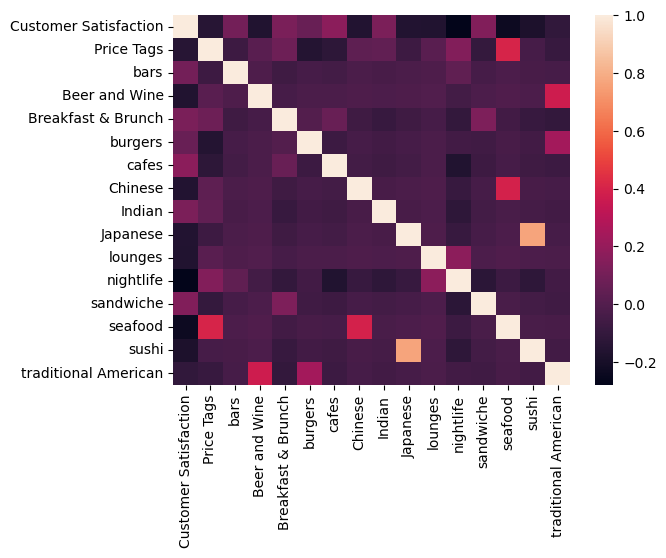

In [93]:

sns.heatmap(small_df.corr(),
                xticklabels= small_df.columns,
                yticklabels=small_df.columns)

In [94]:
###FIXING BALANCE OF DATA (SMOTE) ### (around 70% accuracy)

In [95]:
# #Trying to fix imbalance in data (as seen in confusion matrix)
# #Too few examples of restaurants with low customer satisfaction
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# x,y = get_predictor_response_vars(df)

# counter = Counter(y.values.ravel())
# print('Before SMOTE', counter)

# smote = SMOTE()
# x_smote, y_smote = smote.fit_resample(x, y)

# counter = Counter(y_smote.values.ravel())
# print('After SMOTE', counter)

In [96]:
# #split the data
# from sklearn.model_selection import train_test_split

# x_train, x_val, y_train, y_val = train_test_split(x_smote, y_smote, test_size=0.33, random_state=42)


In [97]:
### OVER SAMPLING WITH RANDOM OVER SAMPLING ### (this is the best -- around 80% accuracy)

In [98]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

x,y = get_predictor_response_vars(df)

# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
# fit and apply the transform
x_over, y_over = oversample.fit_resample(x, y)
# summarize class distribution
print(Counter(y_over))

Counter({1: 83, 0: 27})
Counter({1: 83, 0: 83})


In [99]:
#split the data
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_over, y_over, test_size=0.33, random_state=42)



In [100]:
### TRYING UNDERSAMPLING NOW ### (Result - this is awful)

In [101]:
# from imblearn.under_sampling import RandomUnderSampler

# x,y = get_predictor_response_vars(df)

# # summarize class distribution
# print(Counter(y))

# undersample = RandomUnderSampler(sampling_strategy='majority')

# # fit and apply the transform
# x_under, y_under = undersample.fit_resample(x, y)
# # summarize class distribution
# print(Counter(y_under))

In [102]:
# #split the data
# from sklearn.model_selection import train_test_split

# x_train, x_val, y_train, y_val = train_test_split(x_under, y_under, test_size=0.33, random_state=42)


In [103]:
### THIS IS THE SAME ###

In [104]:
x_train

,Bank_St,Battery St,Cherry_St,Church St,Colchester_Ave,College St,Lawson Ln,Main St,N Winooski Ave,North_St,...,newamerican,nightlife,noodles,pizza,pubs,sandwiche,seafood,sushi,traditional American,wine_bar
6,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
143,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [105]:
#reset indices
x_train = reset_index(x_train)
y_train = reset_index(y_train)
x_val = reset_index(x_val)
y_val = reset_index(y_val)

In [106]:
### HYPERPARAMETER TUNING ###

In [107]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2', None]
# Maximum number of levels in tree
max_depth = [2,4, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [108]:
# Create the param grid
param_distrib = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [109]:
from sklearn.ensemble import RandomForestClassifier
rand_f1 = RandomForestClassifier(random_state=42)

In [110]:
from sklearn.model_selection import RandomizedSearchCV
rand_f1_RandomGrid = RandomizedSearchCV(estimator = rand_f1, param_distributions = param_distrib, n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)

In [111]:
rand_f1_RandomGrid.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [112]:
rand_f1_RandomGrid.best_params_

{'n_estimators': 90,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [115]:
#fit model to our training data
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 90, min_samples_split = 5, 
                                       min_samples_leaf = 2, max_features = 'sqrt',
                                       max_depth = None, bootstrap=False, random_state=42)
#train random forest model
random_forest.fit(x_train, y_train.values.ravel())
#change array shape with .values.ravel()

RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=90, random_state=42)

In [116]:
### FIT MODEL (without tuning) ###

In [117]:
# #fit model to our training data
# from sklearn.ensemble import RandomForestClassifier
# random_forest = RandomForestClassifier(random_state=42)
# #train random forest model
# random_forest.fit(x_train, y_train.values.ravel())
# #change array shape with .values.ravel()

In [118]:
##TEST ACCURACY###

In [119]:
#test
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
y_pred = random_forest.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8181818181818182
Precision: 0.9565217391304348
Recall: 0.7096774193548387


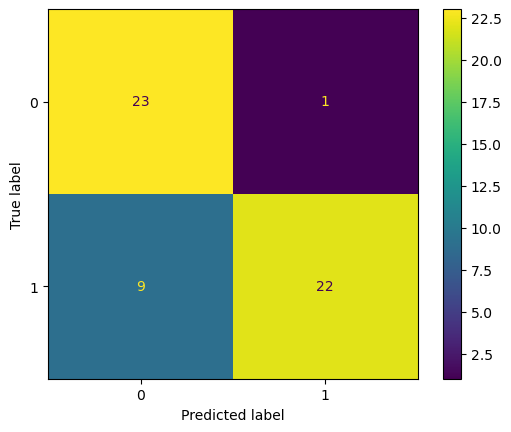

In [120]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion = confusion_matrix(y_val, y_pred)

ConfusionMatrixDisplay(confusion_matrix=confusion).plot()

Text(0.5, 0, 'Model Features')

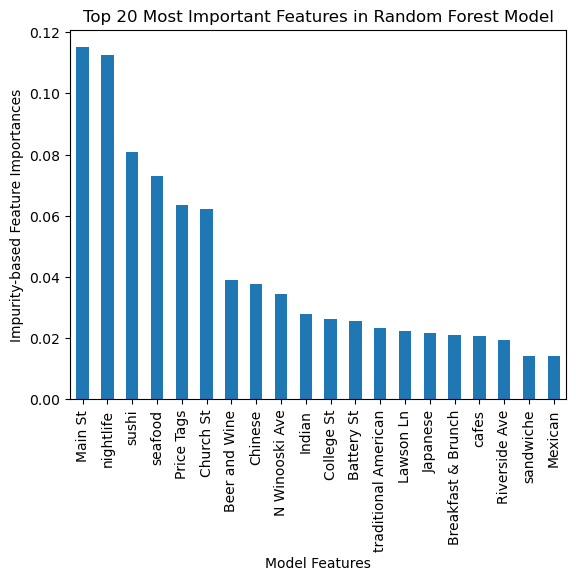

In [121]:
#important of each feature
# feature importances anfd feature names
feature_importances = pd.Series(random_forest.feature_importances_, index=x_train.columns).sort_values(ascending=False)


#top 20 most important features
bar_data = feature_importances[:20]
# bar chart
plt = bar_data.plot.bar()
plt.set_title("Top 20 Most Important Features in Random Forest Model")
plt.set_ylabel('Impurity-based Feature Importances')
plt.set_xlabel('Model Features')



In [57]:
#git rid of least important features
important_columns = feature_importances[:20]

unimportant_columns = feature_importances.index[-25:].to_list()

In [45]:
random_forest.n_features_in_
#there are so many features that aren't important (should they be deleted?)

68

In [46]:
#actual predictions
# Xnew = [[...], [...]]
# ynew = random_forest.predict(Xnew)

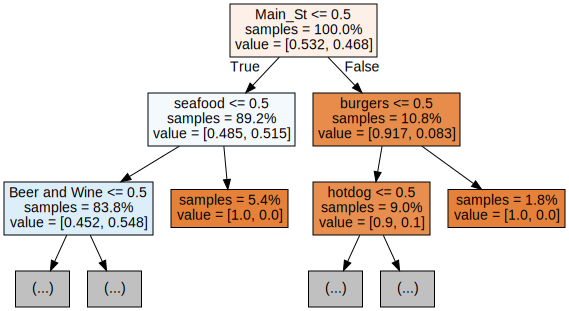

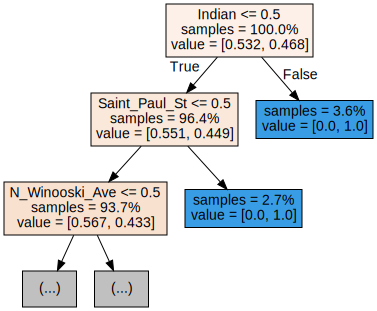

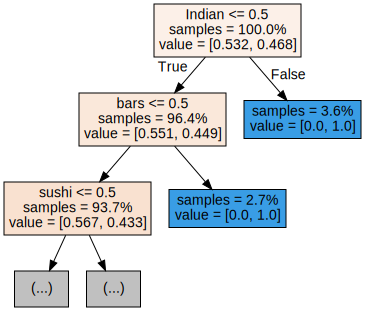

In [47]:
#display first two decision trees in forest
from sklearn.tree import export_graphviz
import graphviz as gv

for i in range(3):
    tree = random_forest.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = gv.Source(dot_data)
    display(graph)

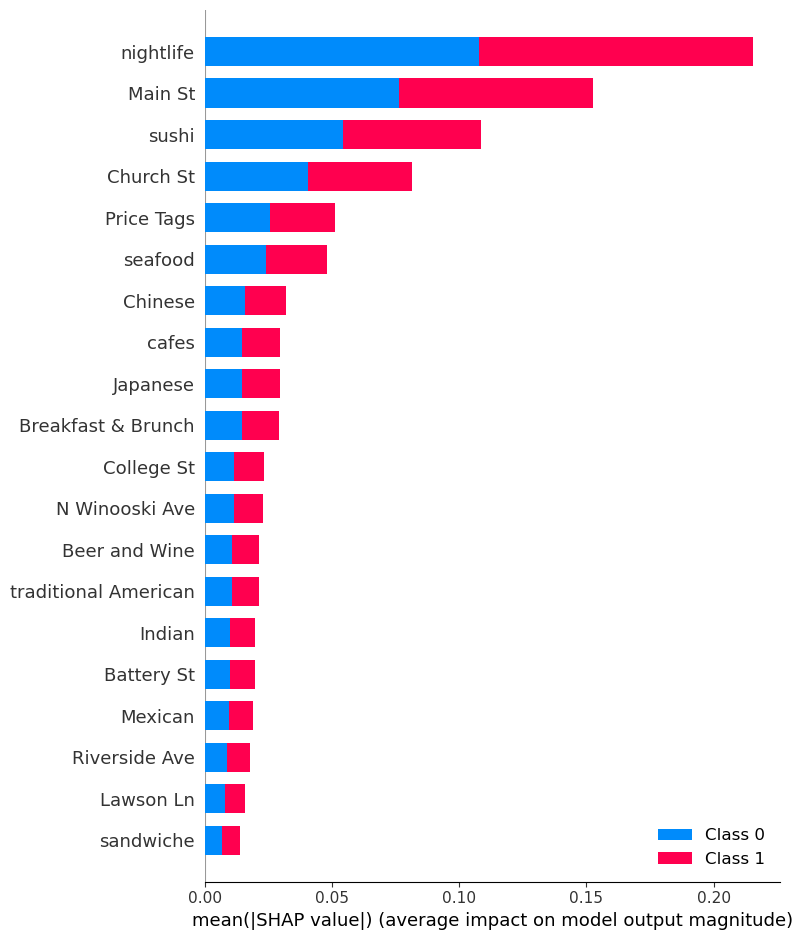

In [124]:
import shap
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(x_val)
shap.summary_plot(shap_values, x_val)
#positive SHAP values lead to the model predicting that the restaurant will have high customer satisfaction
#negative SHAP values lead the model to predict low customer satisfaction

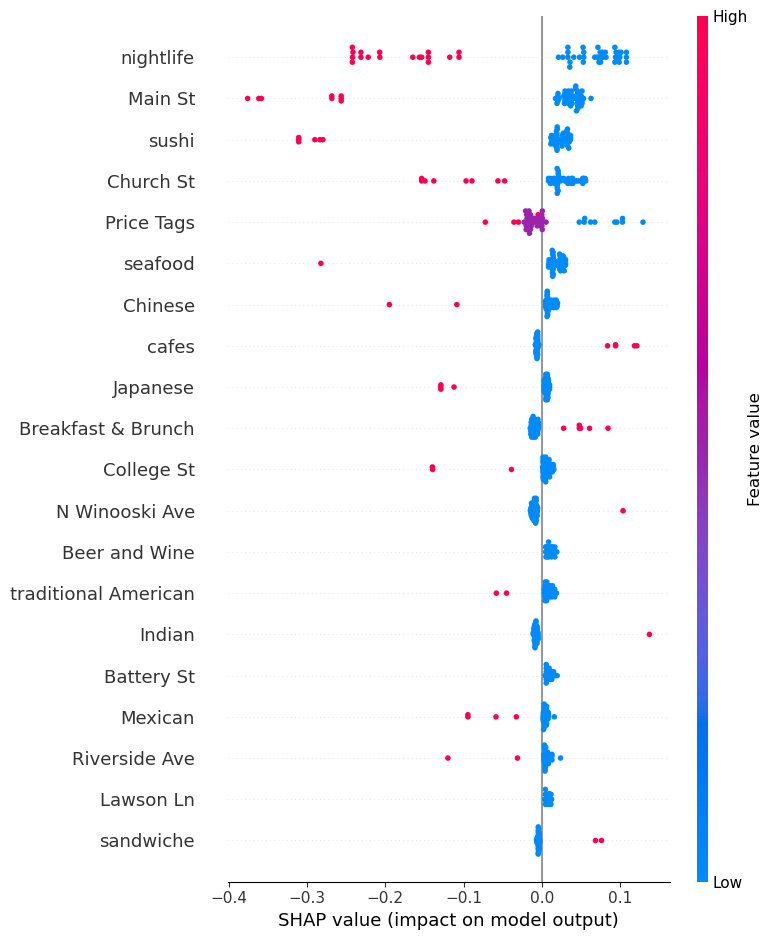

In [125]:
shap.summary_plot(shap_values[1], features=x_val, max_display = 20)

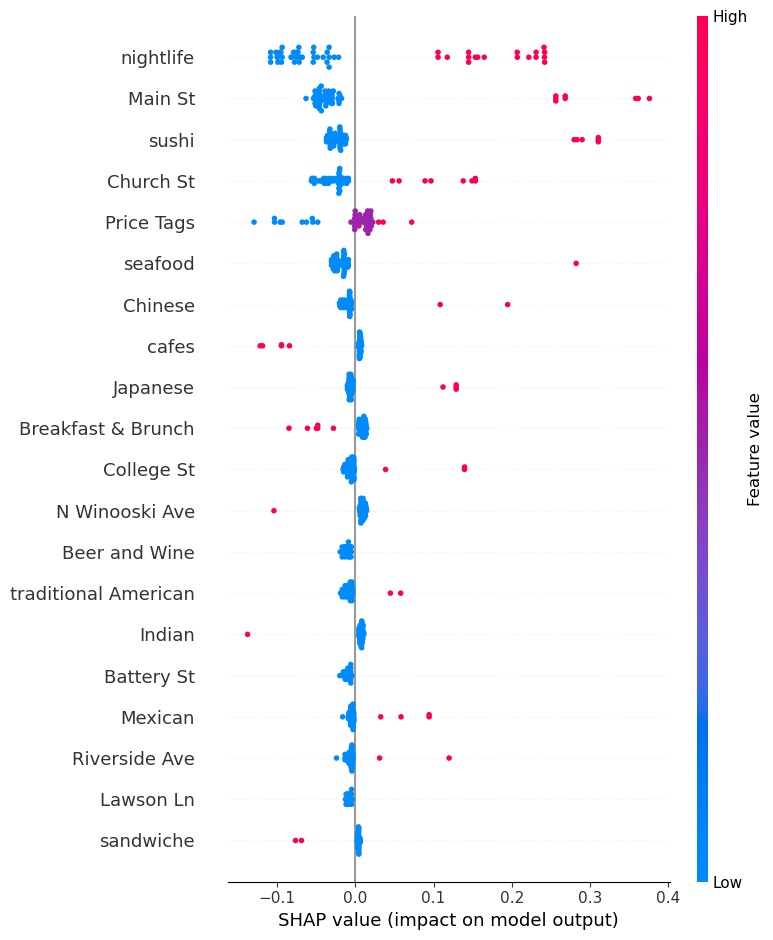

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=4,

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_f

In [126]:
shap.summary_plot(shap_values[0], features=x_val, max_display = 20)